## Week 10 notebook

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Find the fixed effect (the constant term in the regression) for each time (0 through 11)
df = pd.read_csv(r'C:\Users\JT von Seggern\DS Masters Repos\2025-summer-mod-6\homework_10.1.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,city,time,X,y
0,0,0,0.144044,7.552716
1,0,1,1.454274,10.077829
2,0,2,0.761038,12.372731
3,0,3,0.121675,11.489263
4,0,4,0.443863,13.104833


array([[<Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'X'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

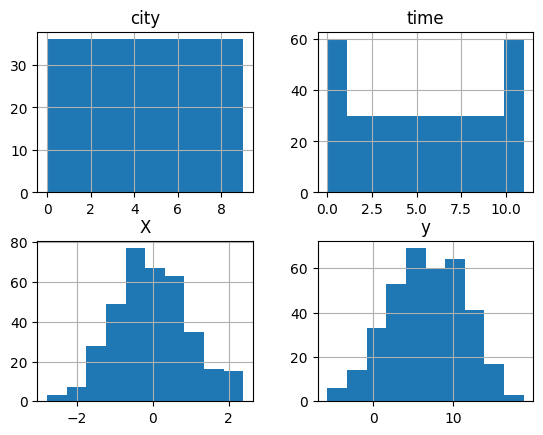

In [3]:
df.hist()

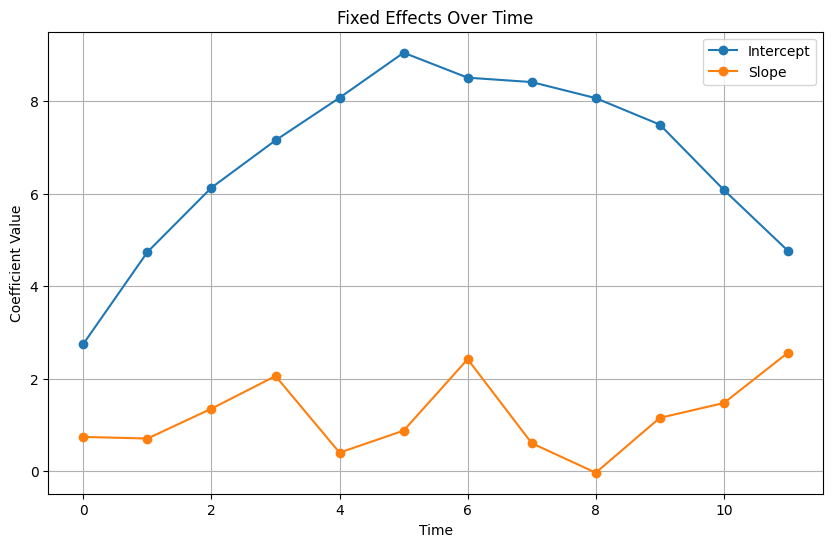

In [ ]:
# Find the fixed effect for each time point
results = {}

for i in df['time'].unique():
    X = sm.add_constant(df[df['time'] == i]['X'])
    y = df[df['time'] == i]['y']
    model = sm.OLS(y, X).fit()
    results[i] = {
        'Intercept': model.params['const'],
        'slope': model.params['X'],
        'R-squared': model.rsquared,
        'p-value': model.pvalues['X'],
    }

#convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = 'time'
results_df.reset_index(inplace=True)

# Display the results
plt.figure(figsize=(10,6))
plt.plot(results_df['time'], results_df['Intercept'], label='Intercept', marker='o')
plt.plot(results_df['time'], results_df['slope'], label='Slope', marker='o')
plt.title('Fixed Effects Over Time')
plt.xlabel('Time')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()

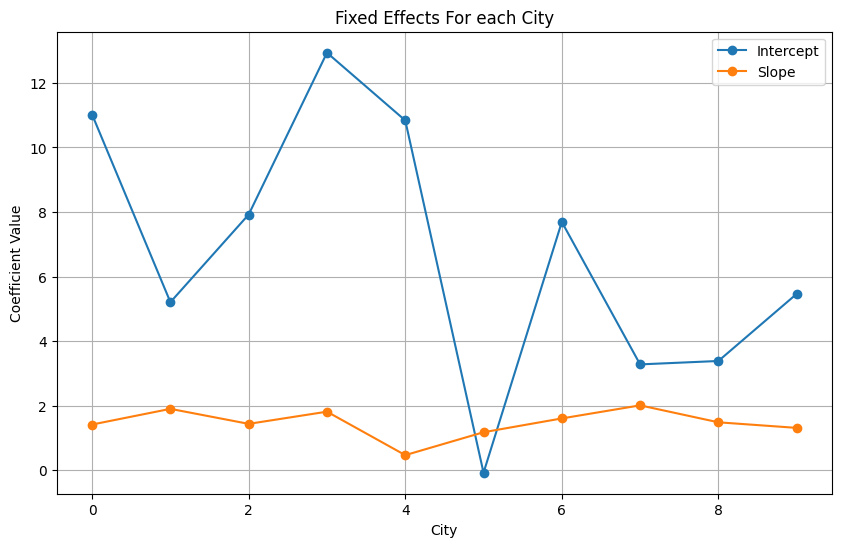

In [8]:
# Find the fixed effect for each city (0 through 9)
results = {}

for i in df['city'].unique():
    X = sm.add_constant(df[df['city'] == i]['X'])
    y = df[df['city'] == i]['y']
    model = sm.OLS(y, X).fit()
    results[i] = {
        'Intercept': model.params['const'],
        'slope': model.params['X'],
        'R-squared': model.rsquared,
        'p-value': model.pvalues['X'],
    }

#convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = 'city'
results_df.reset_index(inplace=True)

# Display the results
plt.figure(figsize=(10,6))
plt.plot(results_df['city'], results_df['Intercept'], label='Intercept', marker='o')
plt.plot(results_df['city'], results_df['slope'], label='Slope', marker='o')
plt.title('Fixed Effects For each City')
plt.xlabel('City')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid()

In [52]:
# New dataset creation
num = 10000 

X = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Z = np.clip(np.random.normal(3, 1, (num,)), 0.01, 100)
Y = np.log(X + Z) + np.random.normal(0, 1, (num,))

df_2 = pd.DataFrame({'X': X, 'Z': Z, 'Y': Y})

# Find the coefficients of X and Y
X = sm.add_constant(df_2[['X', 'Z']])
df_2['EXP(Y)'] = np.exp(df_2['Y'])
y = df_2['EXP(Y)']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 EXP(Y)   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.07e-61
Time:                        21:24:23   Log-Likelihood:                -40599.
No. Observations:               10000   AIC:                         8.120e+04
Df Residuals:                    9997   BIC:                         8.123e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2040      0.618     -0.330      0.7

In [70]:
# Find the standard errors of the coefficients
x_coef = []
x_se_regular = []

for _ in range(100):
    num = 10000 
    Z = np.random.normal(0, 1, (num,)) 
    X = Z + np.random.normal(0, 1, (num,)) 
    Y = 1.5 * X + 2.3 * Z + np.random.normal(0, X**2, (num,)) 
    
    df_sim = pd.DataFrame({'X': X, 'Z': Z, 'Y': Y})
    X_with_const = sm.add_constant(df_sim[['X', 'Z']])
    
    # Regular OLS
    model_regular = sm.OLS(df_sim['Y'], X_with_const).fit()
    
    x_coef.append(model_regular.params['X'])
    x_se_regular.append(model_regular.bse['X'])

print("\n=== Analysis ===")
print(f"Method (i) - Regular SE: {np.mean(x_se_regular):.4f}")
print(f"Method (ii) - Empirical SD: {np.std(x_coef):.4f}")
print(f"Expected coefficient: 1.5")
print(f"Actual mean coefficient: {np.mean(x_coef):.4f}")


=== Analysis ===
Method (i) - Regular SE: 0.0346
Method (ii) - Empirical SD: 0.0566
Expected coefficient: 1.5
Actual mean coefficient: 1.5092
